## Environment Preparation

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import os
import warnings
warnings.filterwarnings("ignore")
from descartes import PolygonPatch
import seaborn as sns

## Load Data and Data Cleaning

In [92]:
# load data

data_path = "./data/"
data_files_path = os.listdir(data_path)
data_all_list = []

for data_file_path in data_files_path:
    full_path = os.path.join(data_path, data_file_path)
    data_month = pd.read_csv(full_path)
    data_month["time"] = data_file_path.split("_")[-1][0:6]
    data_all_list.append(data_month)

data_all_df = pd.concat(data_all_list)
data_all_df.info()
data_all_df.head(5)

# remove the useless columns for visualization: 
# ["product_barcode", "data_url", "manufacture_name"]
data_all_df = data_all_df.drop(columns=["product_barcode"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28556 entries, 0 to 2138
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_barcode       28556 non-null  int64  
 1   product_label         28556 non-null  object 
 2   product_size          28556 non-null  object 
 3   brand_name            28556 non-null  object 
 4   manufacturer_country  28535 non-null  object 
 5   manufacturer_name     28556 non-null  object 
 6   scan_country          28556 non-null  object 
 7   data_url              28556 non-null  object 
 8   bottle_weight         1504 non-null   float64
 9   bottle_count          28556 non-null  int64  
 10  time                  28556 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.6+ MB


In [93]:
data_all_df.info()
data_all_df.head()
# data_all_df["bottle_count"].hist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28556 entries, 0 to 2138
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_label         28556 non-null  object 
 1   product_size          28556 non-null  object 
 2   brand_name            28556 non-null  object 
 3   manufacturer_country  28535 non-null  object 
 4   manufacturer_name     28556 non-null  object 
 5   scan_country          28556 non-null  object 
 6   data_url              28556 non-null  object 
 7   bottle_weight         1504 non-null   float64
 8   bottle_count          28556 non-null  int64  
 9   time                  28556 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.4+ MB


,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,data_url,bottle_weight,bottle_count,time
0,Vimto Gasificado,350 ml,Vimto,GB,Nichols plc,MZ,https://wastebase.org/#/o/85022289-591b-4e34-9...,NaN,1,202103
1,Anti-Bac All Purpose Cleaner,828ml,Method,US,Method Products pbc,GB,https://wastebase.org/#/o/cb2a0f45-314c-4fd0-9...,NaN,1,202103
2,Agua Mineral,5.0 L,Água de Namaacha,MZ,Sociedade de Águas de Moçambique,MZ,https://wastebase.org/#/o/90c9868b-d408-490e-b...,110.0,1,202103
3,Bonaqua Mineral Water,500 ml,Bonaqua,US,Coca-Cola,MZ,https://wastebase.org/#/o/c3710738-2999-4396-a...,NaN,9,202103
4,Fanta Litchi,280 ml,Fanta,US,Coca-Cola,MZ,https://wastebase.org/#/o/c3710738-2999-4396-a...,20.5,6,202103


## (1) Show the Waste by Time and Country

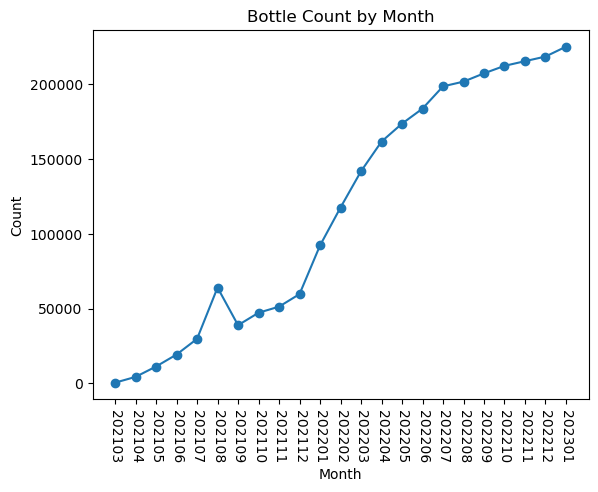

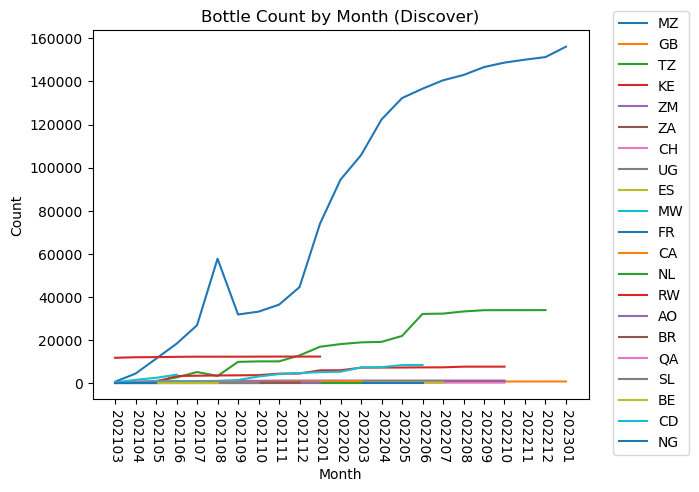

{'MZ': 1965577, 'GB': 8294, 'TZ': 379617, 'KE': 94862, 'ZM': 16579, 'ZA': 3172, 'CH': 21, 'UG': 3376, 'ES': 804, 'MW': 56961, 'FR': 32, 'CA': 4337, 'NL': 13, 'RW': 132033, 'AO': 443, 'BR': 16, 'QA': 21, 'SL': 8, 'BE': 36, 'CD': 7394, 'NG': 3}
{'GB': 14630, 'US': 502060, 'MZ': 1523957, 'UK': 32385, 'JP': 1553, 'PT': 1479, 'ZA': 19752, 'FR': 6033, 'CI': 284, 'SG': 5249, 'TZ': 399039, 'AR': 23, 'TR': 495, 'UA': 445, 'TH': 23, 'AE': 1899, 'ZM': 21874, 'CN': 36, 'GH': 22, 'DE': 473, 'MY': 106, 'KE': 48078, 'LT': 341, 'NL': 3125, 'IN': 5034, nan: 0, 'BE': 8970, 'ZW': 619, 'AT': 176, 'MW': 28236, 'MT': 480, 'DK': 315, 'ES': 378, 'CA': 1407, 'CH': 792, 'RW': 29297, 'EG': 1386, 'AO': 343, 'UG': 4692, 'BR': 10, 'KM': 384, 'BM': 104, 'SL': 8, 'LU': 10, 'CD': 7326, 'VN': 1}


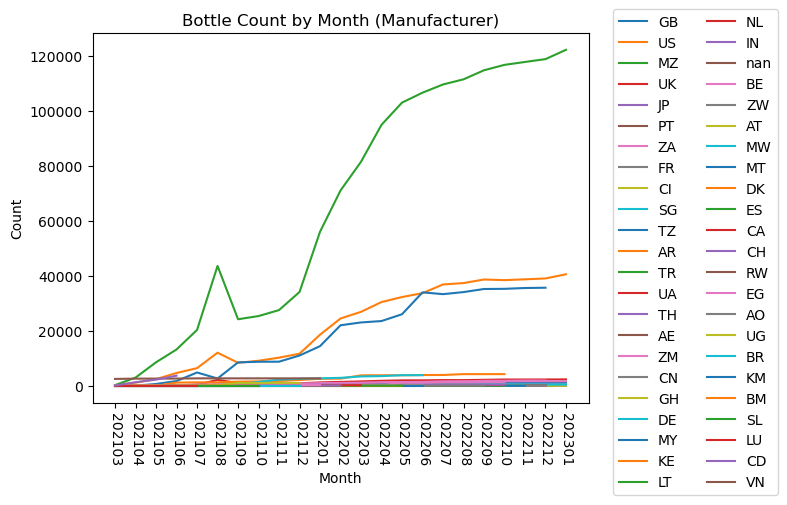

In [119]:
data_df_1 = data_all_df.loc[:, ["manufacturer_country", "scan_country", "bottle_count", "time"]]
df_sum = data_df_1.groupby(["time"]).sum().reset_index()
plt.figure()
plt.plot(df_sum["bottle_count"], marker='o')
plt.xticks(range(df_sum.shape[0]), df_sum["time"], rotation=270)
plt.title("Bottle Count by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.savefig("bottle_count_all.pdf", bbox_inches='tight')
plt.show()


# scan country
scan_unique = list(data_df_1["scan_country"].unique())
plt.figure()
scan_dict = {}
for s in scan_unique:
    scan_df_1 = data_df_1.loc[data_df_1["scan_country"]==s]
    scan_df_sum = scan_df_1.groupby(["time"]).sum().reset_index()
    plt.plot(scan_df_sum["bottle_count"], label=s)
    scan_dict[s] = scan_df_sum["bottle_count"].sum()
plt.xticks(range(df_sum.shape[0]), df_sum["time"], rotation=270)
plt.title("Bottle Count by Month (Discover)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, -0.15), loc=3, borderaxespad=0)
plt.savefig("bottle_count_scan.pdf", bbox_inches='tight')
plt.show()
print(scan_dict)

# manufacturer country
man_unique = list(data_df_1["manufacturer_country"].unique())
plt.figure()
man_dict = {}
for m in man_unique:
    man_df_1 = data_df_1.loc[data_df_1["manufacturer_country"]==m]
    man_df_sum = man_df_1.groupby(["time"]).sum().reset_index()
    plt.plot(man_df_sum["bottle_count"], label=m)
    man_dict[m] = man_df_sum["bottle_count"].sum()
print(man_dict)
plt.xticks(range(df_sum.shape[0]), df_sum["time"], rotation=270)
plt.title("Bottle Count by Month (Manufacturer)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, -0.25), loc=3, borderaxespad=0, ncol=2)
plt.savefig("bottle_count_manu.pdf", bbox_inches='tight')
plt.show()


## (2) Show the Waste by Bottle Size and Count

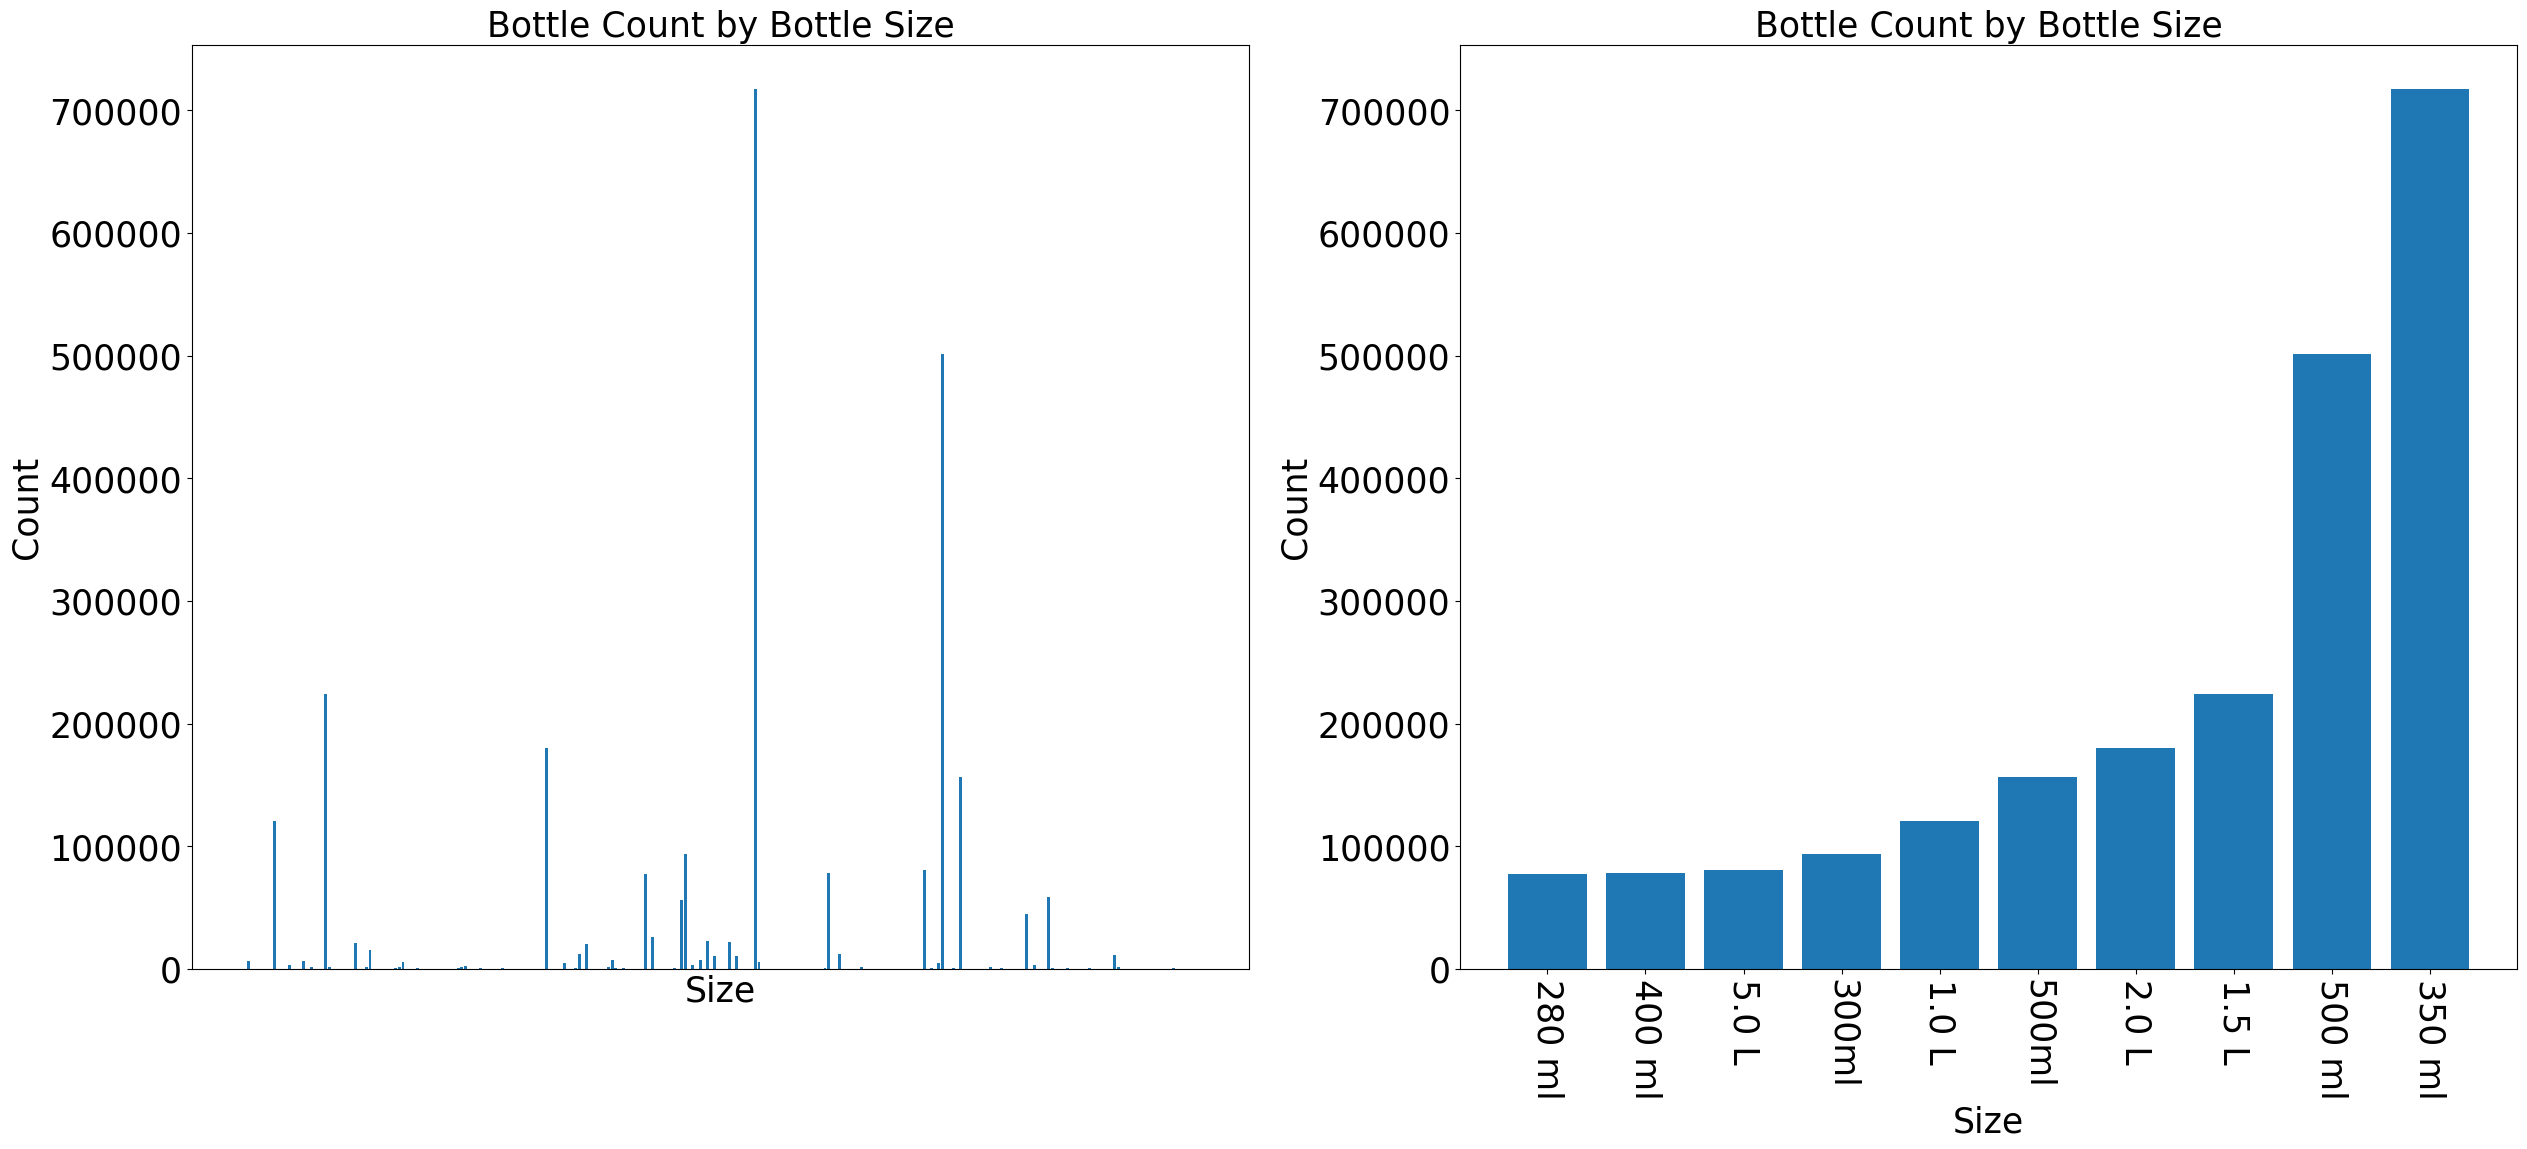

In [145]:
data_df_2 = data_all_df.loc[:, ["manufacturer_country", "scan_country", "bottle_count", "product_size"]]
df_sum = data_df_2.groupby(["product_size"]).sum().reset_index()
sorted_df_sum = df_sum.sort_values(by="bottle_count")
plt.figure(figsize=(30, 12))
plt.subplot(1,2,1)
plt.bar(df_sum["product_size"], df_sum["bottle_count"])
# plt.plot(df_sum["bottle_count"], marker='o')
# plt.xticks(rotation=270)
plt.xticks([])
plt.tick_params(labelsize=25)
plt.title("Bottle Count by Bottle Size", fontdict={'weight':'normal','size': 25})
plt.xlabel("Size", fontsize=25)
plt.ylabel("Count", fontsize=25)

plt.subplot(1,2,2)
plt.bar(sorted_df_sum["product_size"].tail(10), sorted_df_sum["bottle_count"].tail(10))
# plt.plot(df_sum["bottle_count"], marker='o')
plt.xticks(rotation=270)
plt.tick_params(labelsize=25)
plt.title("Bottle Count by Bottle Size", fontdict={'weight':'normal','size': 25})
plt.xlabel("Size", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.savefig("size_count.pdf")
plt.show()


## (3) Show the Waste by Bottle Count and Bottle Brand

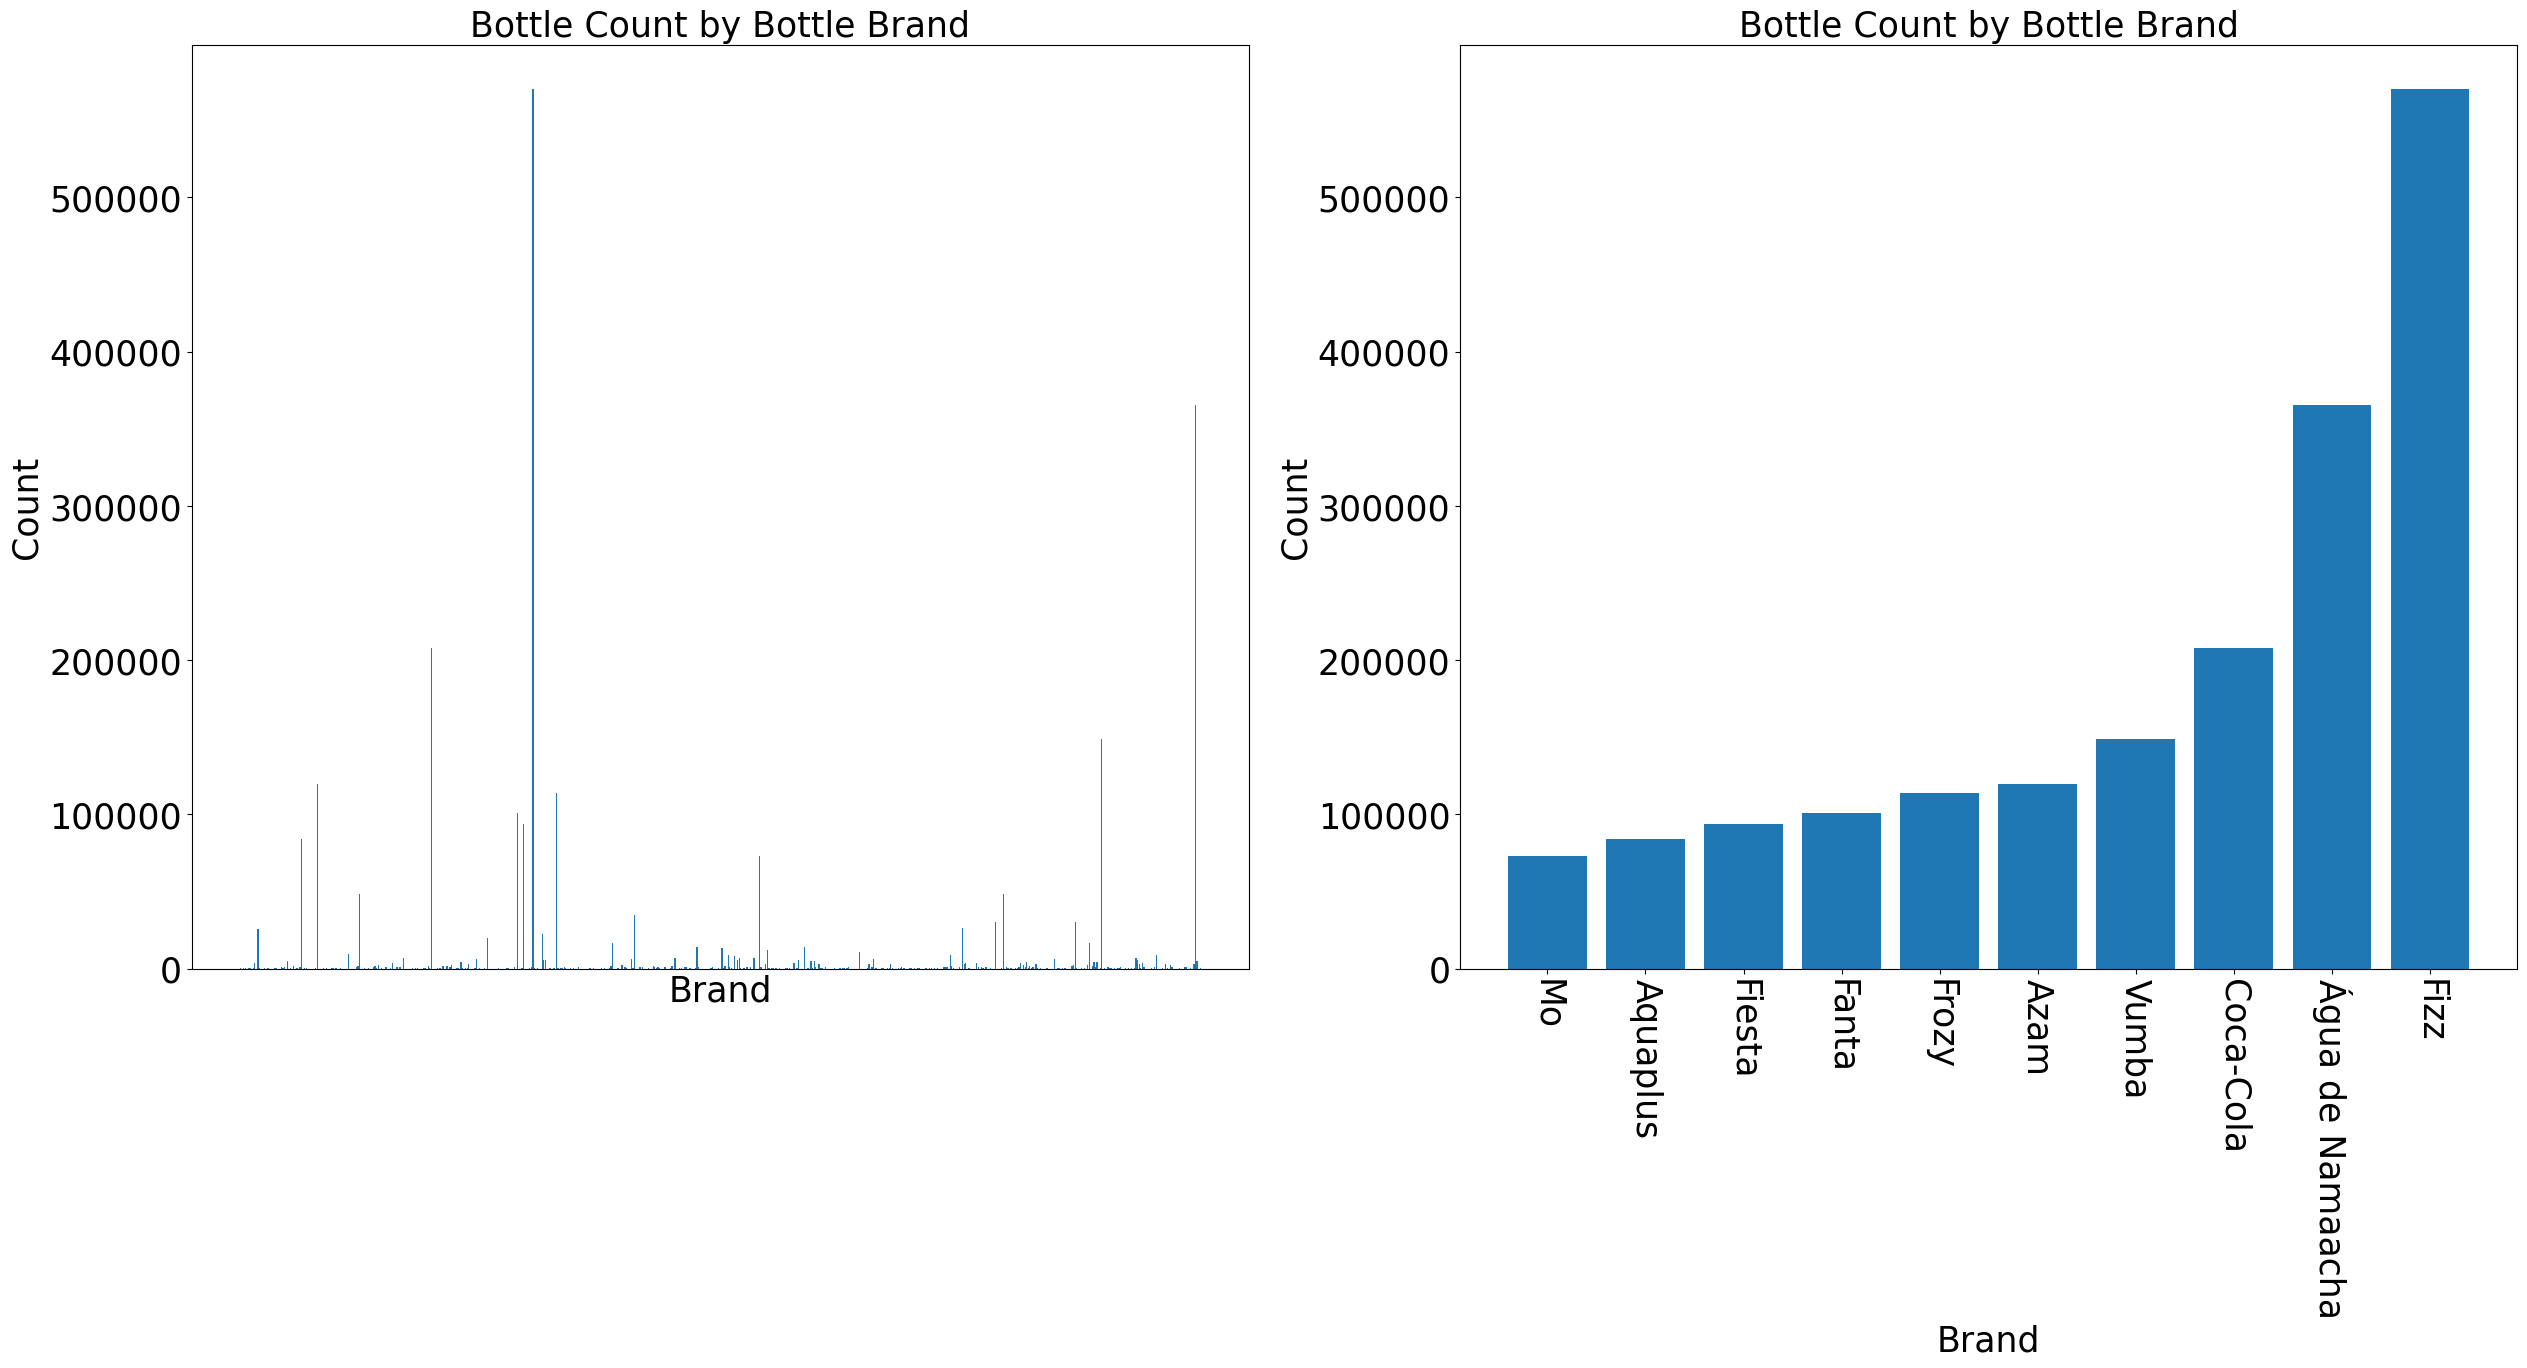

In [179]:
data_df_3 = data_all_df.loc[:, ["manufacturer_country", "scan_country", "bottle_count", "product_size", "brand_name"]]
brand_df_3 = data_df_3.groupby(["brand_name"])["bottle_count"].sum().reset_index()
sorted_brand_df_3 = brand_df_3.sort_values(by="bottle_count")
plt.figure(figsize=(30, 12))
plt.subplot(1,2,1)
plt.bar(brand_df_3["brand_name"], brand_df_3["bottle_count"])
# plt.plot(df_sum["bottle_count"], marker='o')
# plt.xticks(rotation=270)
plt.xticks([])
plt.tick_params(labelsize=25)
plt.title("Bottle Count by Bottle Brand", fontdict={'weight':'normal','size': 25})
plt.xlabel("Brand", fontsize=25)
plt.ylabel("Count", fontsize=25)

plt.subplot(1,2,2)
plt.bar(sorted_brand_df_3["brand_name"].tail(10), sorted_brand_df_3["bottle_count"].tail(10))
# plt.plot(df_sum["bottle_count"], marker='o')
plt.xticks(rotation=270)
plt.tick_params(labelsize=25)
plt.title("Bottle Count by Bottle Brand", fontdict={'weight':'normal','size': 25})
plt.xlabel("Brand", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.savefig("brand_count.pdf")
plt.show()

['Mo' 'Aquaplus' 'Fiesta' 'Fanta' 'Frozy' 'Azam' 'Vumba' 'Coca-Cola'
 'Água de Namaacha' 'Fizz']
['280 ml' '400 ml' '5.0 L' '300ml' '1.0 L' '500ml' '2.0 L' '1.5 L'
 '500 ml' '350 ml']
[165, 57717, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1599, 0, 0]
[0, 0, 0, 0, 0, 35759, 7157, 0, 50907, 0]
[3208, 0, 0, 0, 14160, 1295, 42894, 1940, 14544, 510]
[0, 0, 0, 0, 0, 0, 8275, 0, 0, 103747]
[0, 0, 0, 82522, 0, 2988, 0, 0, 11956, 0]
[0, 0, 8355, 0, 0, 72190, 0, 68383, 0, 0]
[74219, 0, 0, 299, 38569, 1939, 67403, 468, 11801, 286]
[0, 0, 43896, 0, 0, 0, 0, 71282, 250299, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 570445]


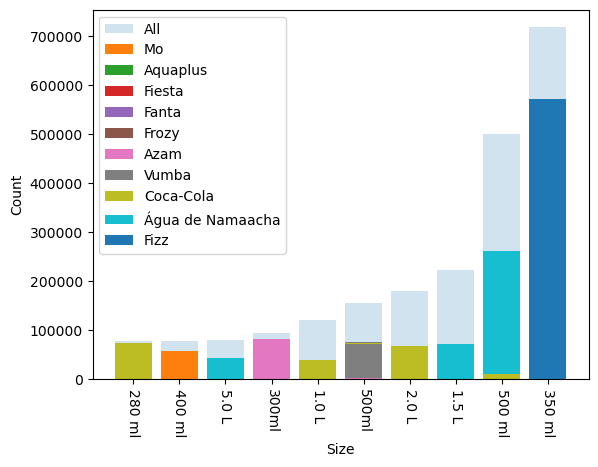

In [181]:
data_df_4 = data_all_df.loc[:, ["bottle_count", "product_size", "brand_name"]]
top_brand = sorted_brand_df_3.tail(10).brand_name.values
top_size = sorted_df_sum.tail(10).product_size.values
top_size_count = sorted_df_sum.tail(10).bottle_count.values
print(top_brand)
print(top_size)
plt.figure()
size_list = [0]*10
plt.bar(top_size, top_size_count, label="All", alpha=0.2)
for b in top_brand:
    data_4_b = data_df_4.loc[data_df_4["brand_name"]==b].groupby("product_size")["bottle_count"].sum().reset_index()
    size_list_old = size_list
    size_list = []
    for i in top_size:
        if i in list(data_4_b.product_size.values):
            size_list.append(int(data_4_b.loc[data_4_b["product_size"]==i, "bottle_count"].values))
        else:
            size_list.append(0)
    plt.bar(top_size,size_list,bottom=size_list_old,label=b)
    print(size_list)
plt.xticks(rotation=270)
# plt.tick_params(labelsize=25)
plt.xlabel("Size")
plt.ylabel("Count")

plt.legend()
plt.savefig("brand_size_count.pdf")
# data_df_4_brand = data_df_4.groupby("brand_name")
# data_df_4_brand.head()

## Show the Waste in World Map

In [77]:
# read in country data, tidy up column names
country_codes = pd.read_csv('countries_codes_and_coordinates.csv').rename(columns={'Alpha-2 code': 'iso_a2', 'Alpha-3 code': 'iso_a3', 'Latitude (average)':'lat', 'Longitude (average)':'lng'})
country_codes.set_index(['iso_a3'])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).set_index('name').drop('Antarctica')
world.set_index(['iso_a3']).join(country_codes, rsuffix='-B')
world = pd.merge(world, country_codes, how="left")

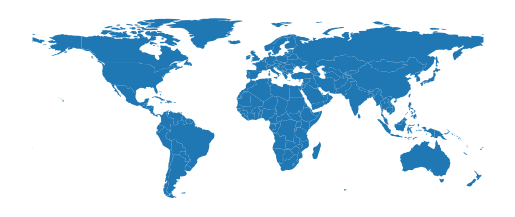

In [8]:
ax = world.plot()
ax.set_axis_off()

In [55]:
countries = gpd.GeoDataFrame(country_codes, geometry=gpd.points_from_xy(country_codes.lng, country_codes.lat)).copy()

In [59]:
# show scan waste
scan_waste = data_all_df[["scan_country", "bottle_count"]].groupby("scan_country").sum().reset_index()
scan_waste['iso_a2'] = scan_waste.scan_country.astype(str)
scan_waste.head()

,scan_country,bottle_count,iso_a2
0,AO,443,AO
1,BE,36,BE
2,BR,16,BR
3,CA,4337,CA
4,CD,7394,CD


In [60]:
# show manu waste
manu_waste = data_all_df[["manufacturer_country", "bottle_count"]].groupby("manufacturer_country").sum().reset_index()
manu_waste['iso_a2'] = manu_waste.manufacturer_country.astype(str)
manu_waste.head()

,manufacturer_country,bottle_count,iso_a2
0,AE,1899,AE
1,AO,343,AO
2,AR,23,AR
3,AT,176,AT
4,BE,8970,BE


In [72]:
# show flow
waste_flow = data_all_df.loc[data_all_df.manufacturer_country != data_all_df.scan_country]
start_points = pd.merge(countries[['geometry','iso_a2']], waste_flow[['bottle_count', 'manufacturer_country', 'scan_country', 'product_barcode']], left_on='iso_a2', right_on='manufacturer_country', how='inner')
end_points = pd.merge(countries[['geometry','iso_a2']], waste_flow[['bottle_count', 'manufacturer_country', 'scan_country', 'product_barcode']], left_on='iso_a2', right_on='scan_country', how='inner')
start_points.rename(columns={'geometry':'start_point'}, inplace=True)
end_points.rename(columns={'geometry':'end_point'}, inplace=True)

from shapely.geometry import LineString
waste_line = pd.merge(start_points[['manufacturer_country', 'scan_country', 'start_point', 'bottle_count', 'product_barcode']], end_points[['manufacturer_country', 'scan_country', 'end_point', 'product_barcode']], left_on=['manufacturer_country', 'scan_country', 'product_barcode'], right_on=['manufacturer_country', 'scan_country', 'product_barcode'], how='inner')
waste_line.info()
waste_line['line'] = waste_line.apply(lambda row: LineString([row['start_point'], row['end_point']]), axis=1)
waste_line = waste_line.set_geometry('line')


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 216560 entries, 0 to 216559
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   manufacturer_country  216119 non-null  object  
 1   scan_country          216560 non-null  object  
 2   start_point           216560 non-null  geometry
 3   bottle_count          216560 non-null  int64   
 4   product_barcode       216560 non-null  int64   
 5   end_point             216560 non-null  geometry
dtypes: geometry(2), int64(2), object(2)
memory usage: 11.6+ MB


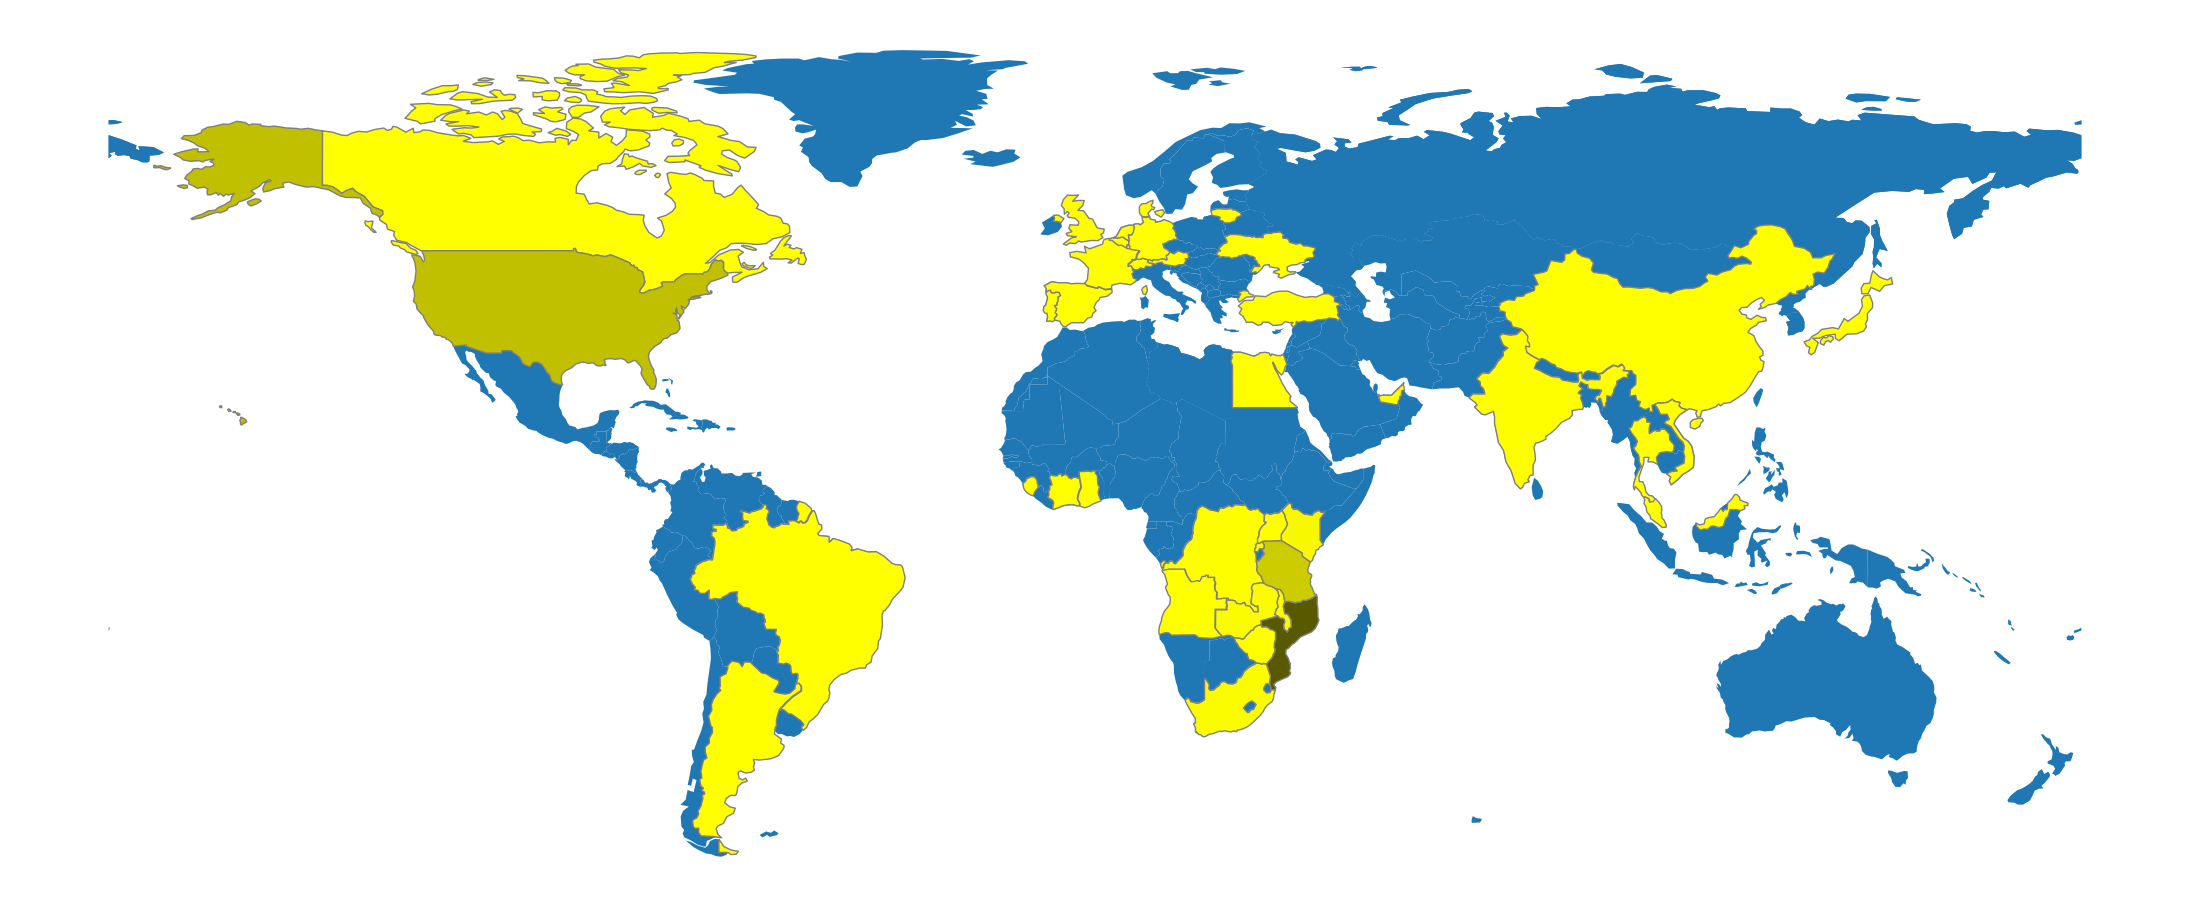

In [113]:
# manutacturer country
ax = world.plot(figsize=(28,32))
ax.set_axis_off()

# by_mfr.plot(color='blue', ax=ax, markersize=by_mfr['plotsize'], alpha=0.5)
# by_scan.plot(color='red', ax=ax, markersize=by_scan['plotsize'], alpha=0.5)

# Finally overlay the flow lines
df_sum = data_all_df.groupby(["manufacturer_country"])["bottle_count"].sum().reset_index()
# print(df_sum)
count_sum = df_sum["bottle_count"].sum()
for i in range(df_sum.shape[0]):
    # if df_sum.loc[i, "manufacturer_country"] == "MZ":
    #     continue
    factor = 1-np.log2(df_sum.loc[i, "bottle_count"]/count_sum+1)
    world[world.iso_a2==df_sum.loc[i, "manufacturer_country"]].plot(edgecolor=u'gray', color=(factor,factor,0), ax=ax)

plt.savefig("manufacturer_country.pdf", bbox_inches='tight')
# waste_line.plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)
# waste_line.loc[(waste_line["manufacturer_country"]=="MZ")].plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)

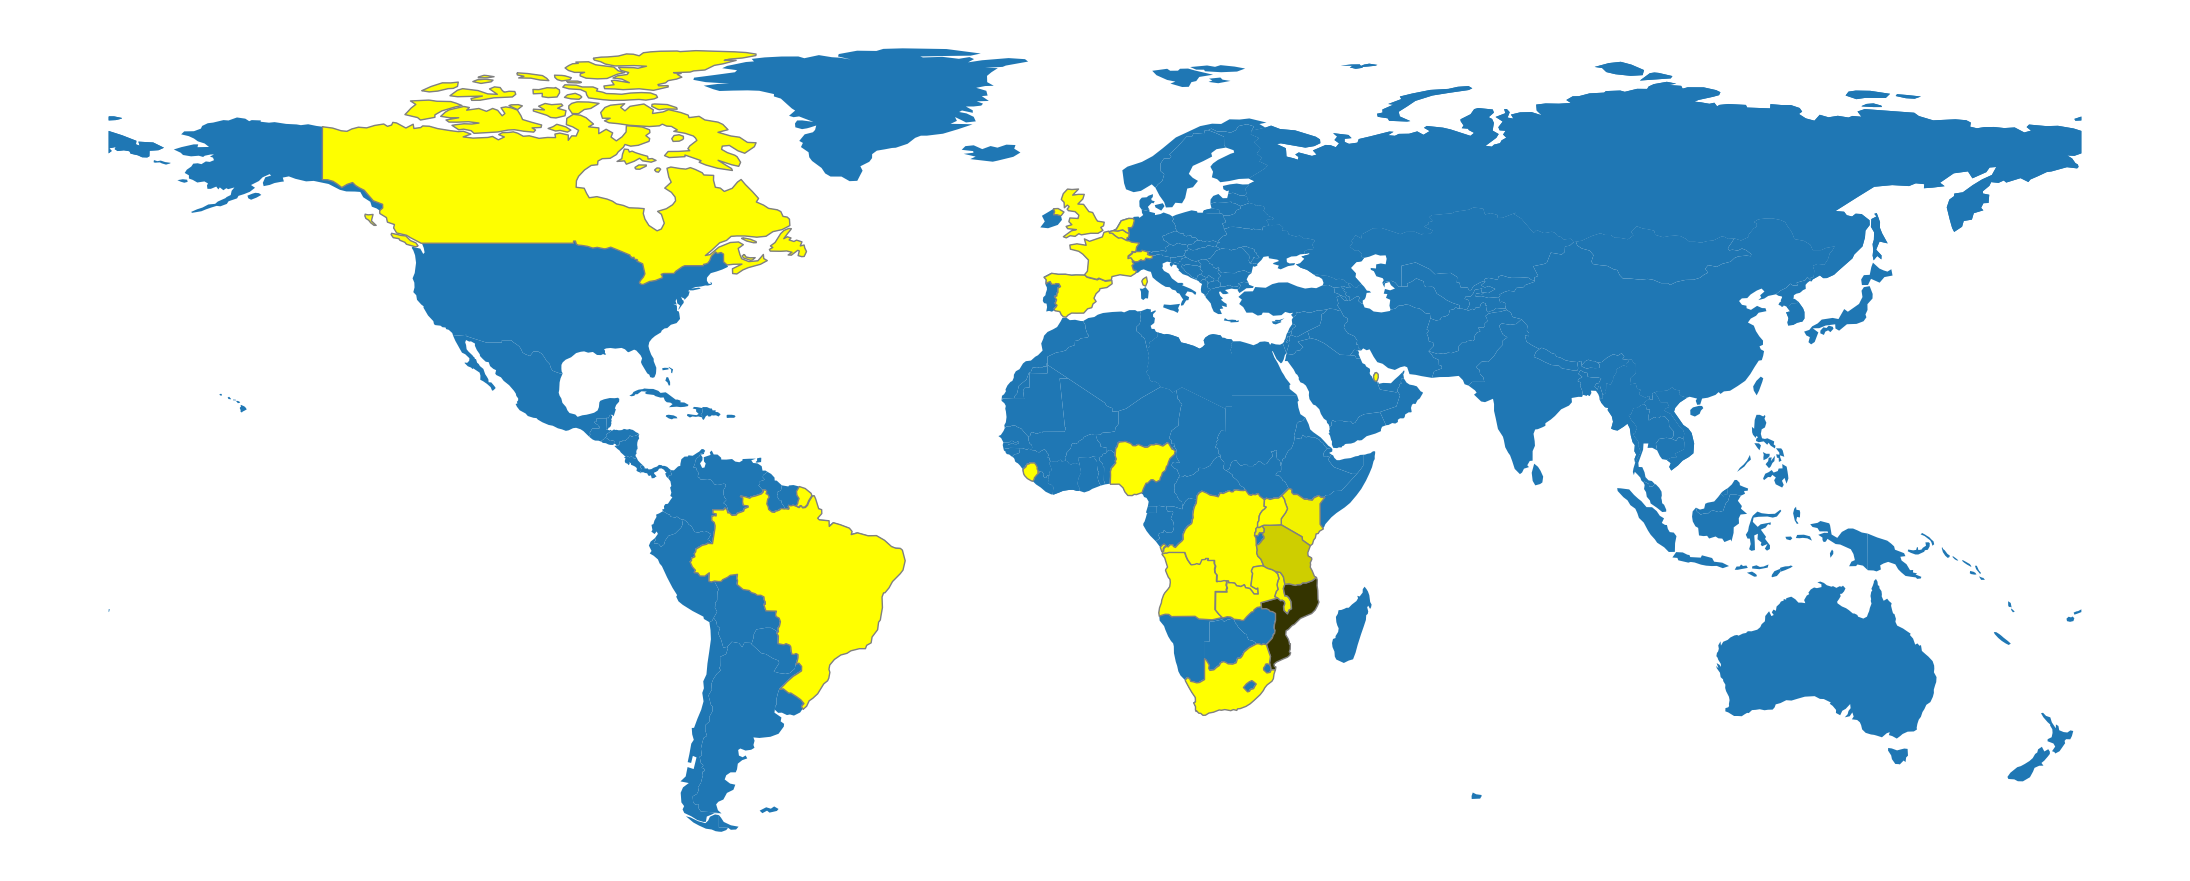

In [114]:
# scan country
ax = world.plot(figsize=(28,32))
ax.set_axis_off()

# by_mfr.plot(color='blue', ax=ax, markersize=by_mfr['plotsize'], alpha=0.5)
# by_scan.plot(color='red', ax=ax, markersize=by_scan['plotsize'], alpha=0.5)

# Finally overlay the flow lines
df_sum = data_all_df.groupby(["scan_country"])["bottle_count"].sum().reset_index()
# print(df_sum)
count_sum = df_sum["bottle_count"].sum()
for i in range(df_sum.shape[0]):
    # if df_sum.loc[i, "manufacturer_country"] == "MZ":
    #     continue
    factor = 1-np.log2(df_sum.loc[i, "bottle_count"]/count_sum+1)
    world[world.iso_a2==df_sum.loc[i, "scan_country"]].plot(edgecolor=u'gray', color=(factor,factor,0), ax=ax)

plt.savefig("scan_country.pdf", bbox_inches='tight')


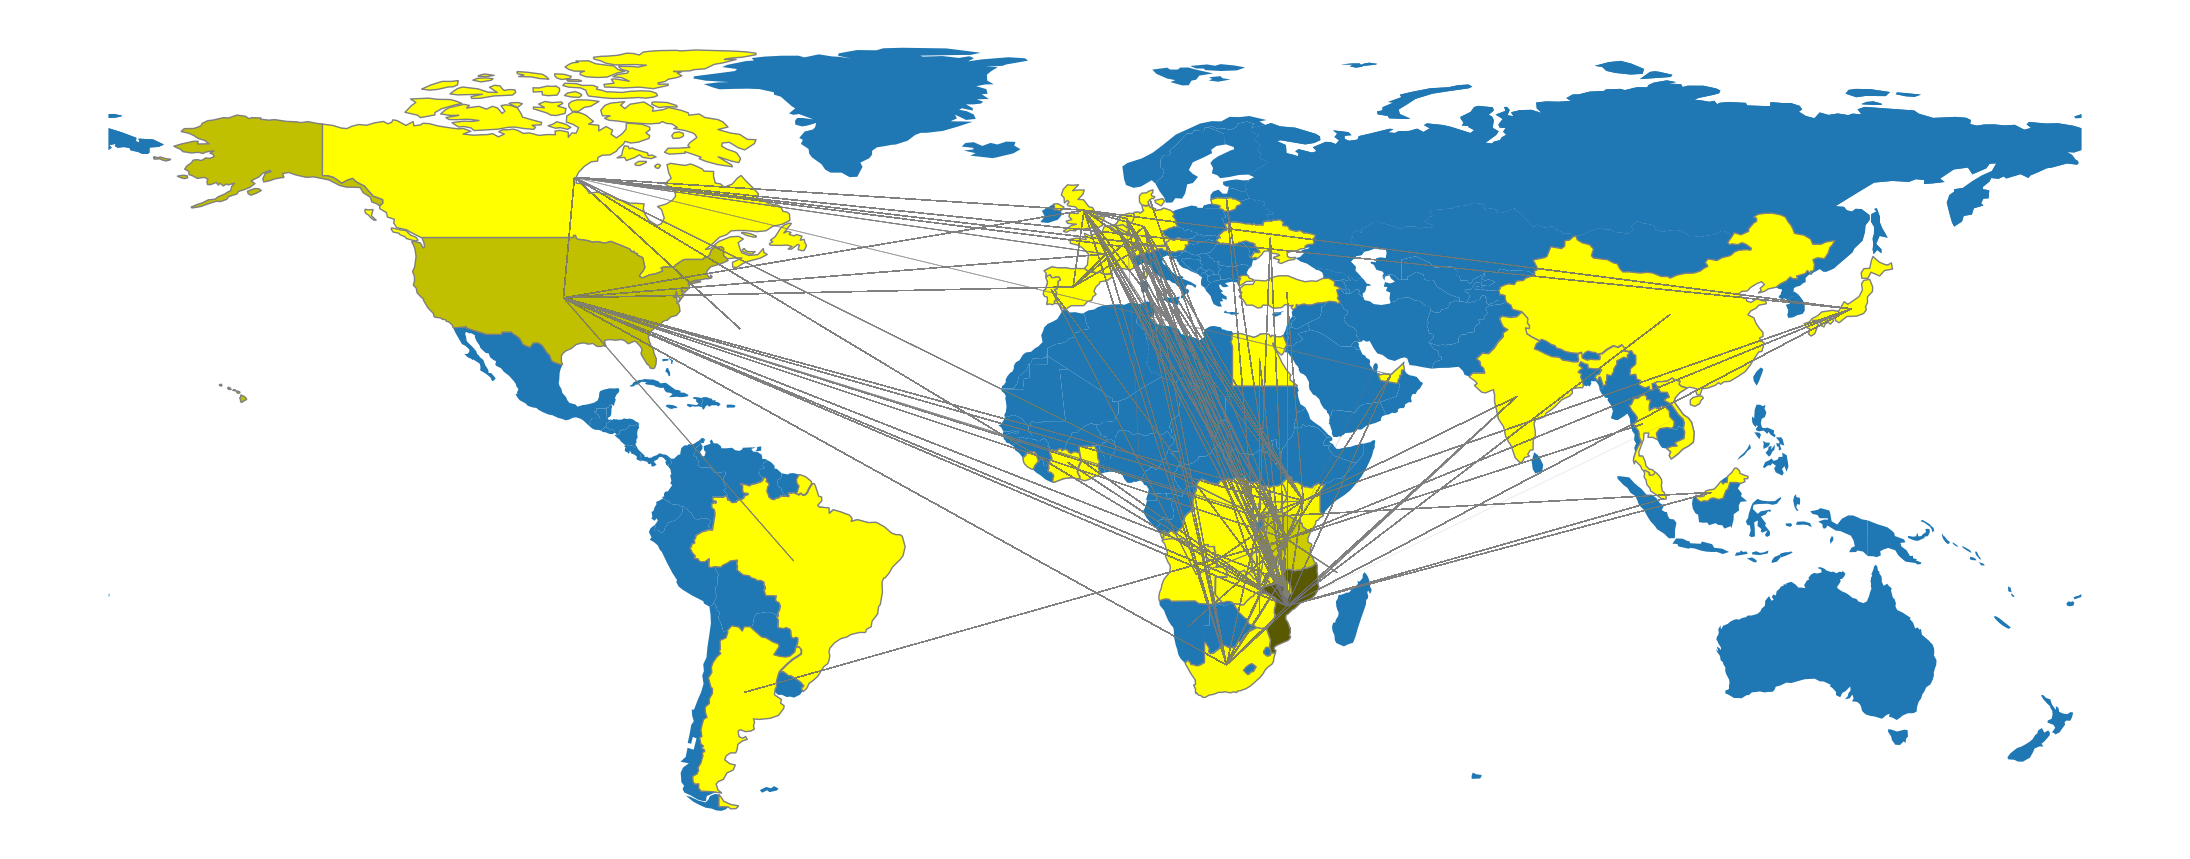

In [116]:
# worldwide flow
ax = world.plot(figsize=(28,32))
ax.set_axis_off()

# by_mfr.plot(color='blue', ax=ax, markersize=by_mfr['plotsize'], alpha=0.5)
# by_scan.plot(color='red', ax=ax, markersize=by_scan['plotsize'], alpha=0.5)

# Finally overlay the flow lines
df_sum = data_all_df.groupby(["manufacturer_country"])["bottle_count"].sum().reset_index()
# print(df_sum)
count_sum = df_sum["bottle_count"].sum()
for i in range(df_sum.shape[0]):
    # if df_sum.loc[i, "manufacturer_country"] == "MZ":
    #     continue
    factor = 1-np.log2(df_sum.loc[i, "bottle_count"]/count_sum+1)
    world[world.iso_a2==df_sum.loc[i, "manufacturer_country"]].plot(edgecolor=u'gray', color=(factor,factor,0), ax=ax)


waste_line.plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)
plt.savefig("world_flow.pdf", bbox_inches='tight')
# waste_line.loc[(waste_line["manufacturer_country"]=="MZ")].plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)

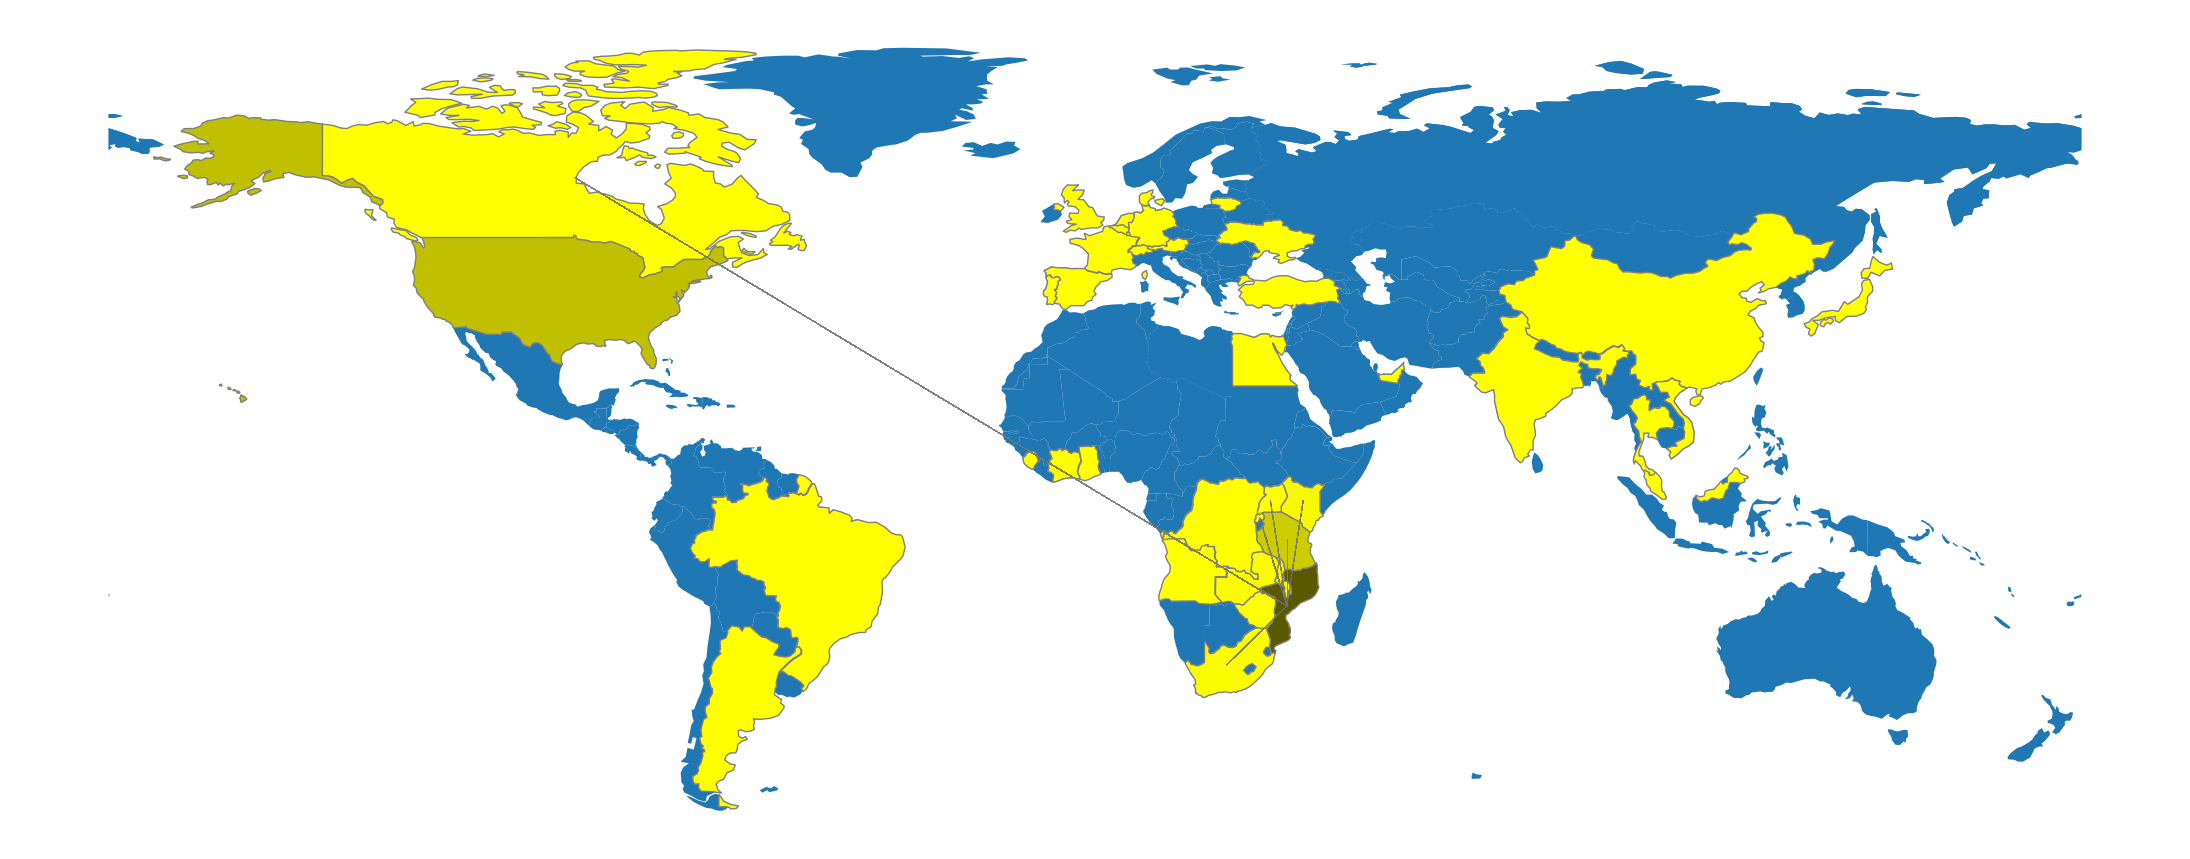

In [117]:
# from MZ
ax = world.plot(figsize=(28,32))
ax.set_axis_off()

# by_mfr.plot(color='blue', ax=ax, markersize=by_mfr['plotsize'], alpha=0.5)
# by_scan.plot(color='red', ax=ax, markersize=by_scan['plotsize'], alpha=0.5)

# Finally overlay the flow lines
df_sum = data_all_df.groupby(["manufacturer_country"])["bottle_count"].sum().reset_index()
# print(df_sum)
count_sum = df_sum["bottle_count"].sum()
for i in range(df_sum.shape[0]):
    # if df_sum.loc[i, "manufacturer_country"] == "MZ":
    #     continue
    factor = 1-np.log2(df_sum.loc[i, "bottle_count"]/count_sum+1)
    world[world.iso_a2==df_sum.loc[i, "manufacturer_country"]].plot(edgecolor=u'gray', color=(factor,factor,0), ax=ax)


# waste_line.plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)

waste_line.loc[(waste_line["manufacturer_country"]=="MZ")].plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)
plt.savefig("from_MZ.pdf", bbox_inches='tight')

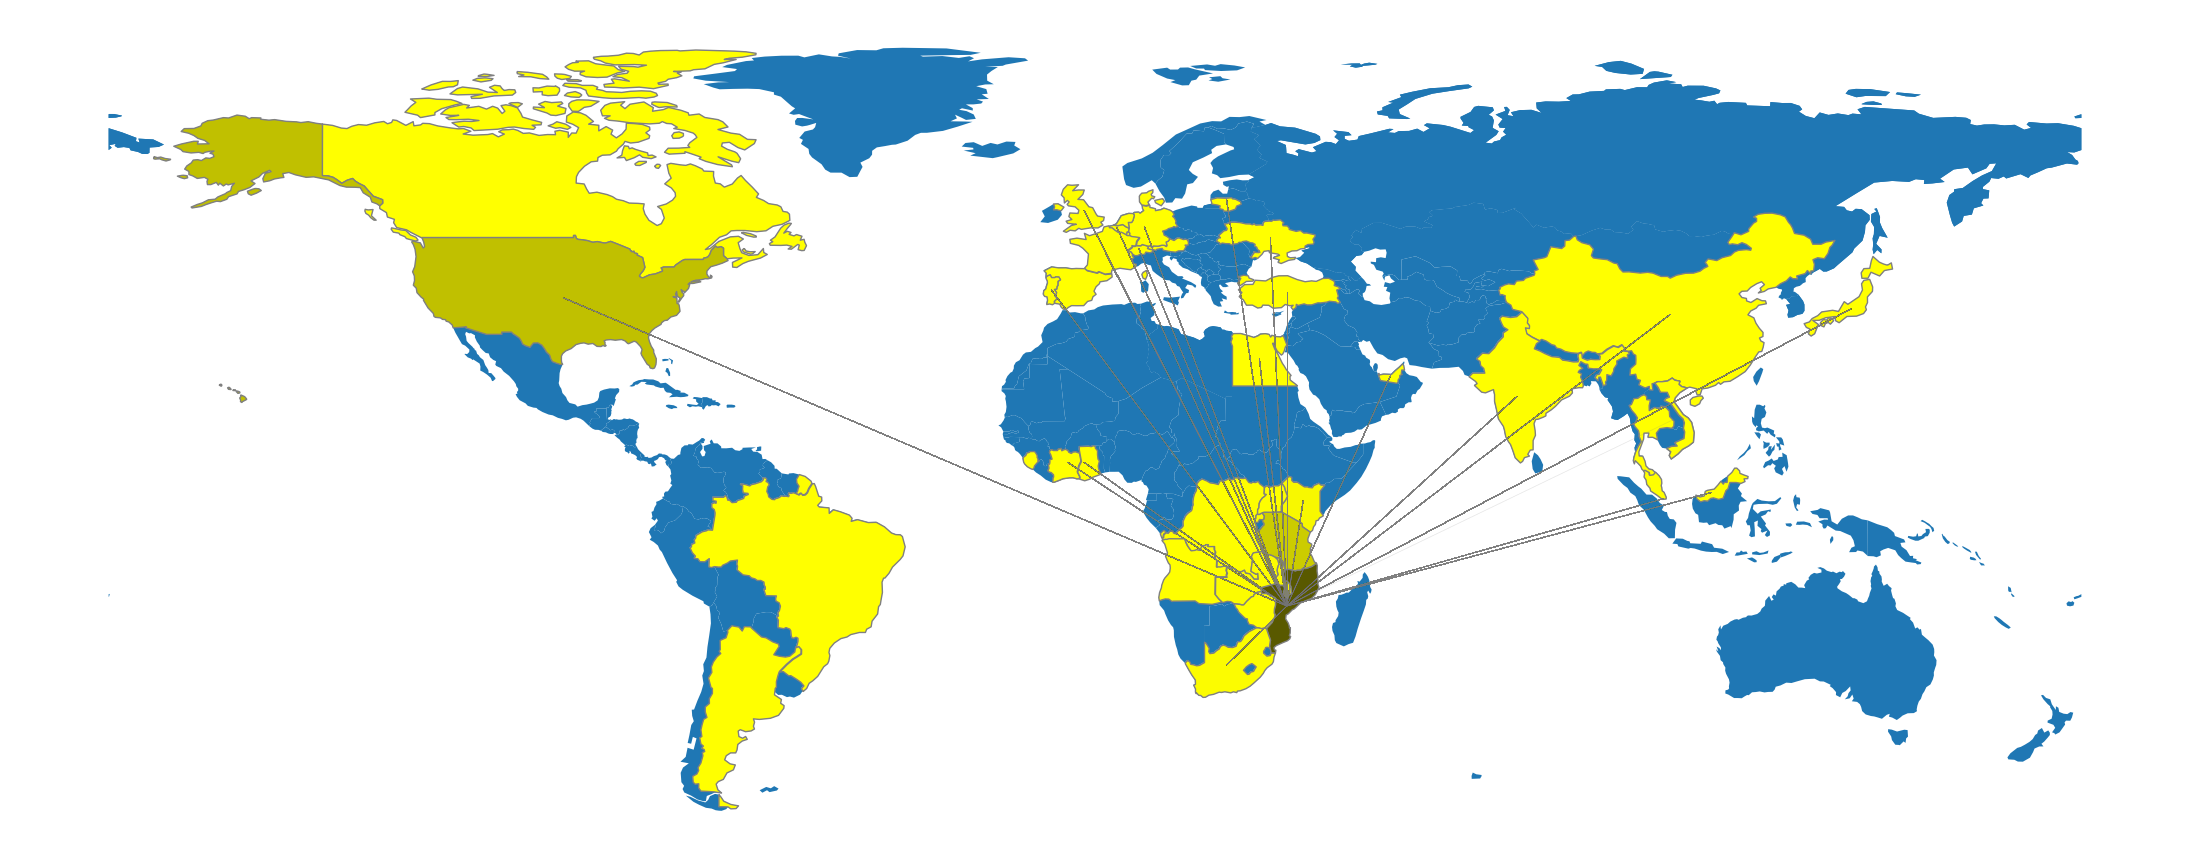

In [118]:
# to MZ
ax = world.plot(figsize=(28,32))
ax.set_axis_off()

# by_mfr.plot(color='blue', ax=ax, markersize=by_mfr['plotsize'], alpha=0.5)
# by_scan.plot(color='red', ax=ax, markersize=by_scan['plotsize'], alpha=0.5)

# Finally overlay the flow lines
df_sum = data_all_df.groupby(["manufacturer_country"])["bottle_count"].sum().reset_index()
# print(df_sum)
count_sum = df_sum["bottle_count"].sum()
for i in range(df_sum.shape[0]):
    # if df_sum.loc[i, "manufacturer_country"] == "MZ":
    #     continue
    factor = 1-np.log2(df_sum.loc[i, "bottle_count"]/count_sum+1)
    world[world.iso_a2==df_sum.loc[i, "manufacturer_country"]].plot(edgecolor=u'gray', color=(factor,factor,0), ax=ax)


waste_line.loc[(waste_line["scan_country"]=="MZ")].plot(color='gray', ax=ax, linewidth=0.5,alpha=0.1)
plt.savefig("to_MZ.pdf", bbox_inches='tight')